In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/BenchmarkingSample20230607.csv')
df

,Unit,Period,Days,Account,Amount
0,00040302CD88,1,30,Sales,89952
1,00040302CD88,2,31,Sales,90594
2,00040302CD88,3,30,Sales,81909
3,00040302CD88,4,31,Sales,87418
4,00040302CD88,5,31,Sales,91109
...,...,...,...,...,...
6043,0004030BEB57,20,30,Other Non-controllables,1455
6044,0004030BEB57,21,31,Other Non-controllables,7456
6045,0004030BEB57,22,31,Other Non-controllables,2037
6046,0004030BEB57,23,28,Other Non-controllables,2037


## Data Understanding

In [4]:
# 6048 rows and 5 columns of data
df.shape

(6048, 5)

In [5]:
# First 20 rows
df.head(21)

,Unit,Period,Days,Account,Amount
0,00040302CD88,1,30,Sales,89952
1,00040302CD88,2,31,Sales,90594
2,00040302CD88,3,30,Sales,81909
3,00040302CD88,4,31,Sales,87418
4,00040302CD88,5,31,Sales,91109
5,00040302CD88,6,30,Sales,94117
6,00040302CD88,7,31,Sales,101795
7,00040302CD88,8,30,Sales,92009
8,00040302CD88,9,31,Sales,97194
9,00040302CD88,10,31,Sales,101624


In [6]:
df.columns

Index(['Unit', 'Period', 'Days', 'Account', 'Amount'], dtype='object')

In [7]:
# See comlumns' type
df.dtypes

Unit       object
Period      int64
Days        int64
Account    object
Amount      int64
dtype: object

In [8]:
df.describe()

,Period,Days,Amount
count,6048.000000,6048.000000,6048.000000
mean,12.500000,30.416667,16741.724868
std,6.922759,0.862078,54557.719130
min,1.000000,28.000000,-14050.000000
25%,6.750000,30.000000,435.000000
50%,12.500000,31.000000,1899.000000
75%,18.250000,31.000000,7080.000000
max,24.000000,31.000000,573462.000000


In [9]:
grouped_data = df.groupby(by=["Unit", "Account"])
grouped_data

In [10]:
grouped_data['Amount'].describe()

count           mean           std  \
Unit         Account                                                     
00040302CD88 Advertising             24.0    4572.541667    761.509826   
             Cost of Sales - Food    24.0   30026.083333   7118.143193   
             Cost of Sales - Paper   24.0    3422.541667    898.332270   
             Crew Labor              24.0   29224.625000  11381.191203   
             Maintenance & Repair    72.0    1092.138889    992.898323   
...                                   ...            ...           ...   
0004030BEB57 Outside Services        24.0   12472.083333   2648.574152   
             Promotion               24.0     847.000000    819.401160   
             Rent                    24.0   66201.208333   5877.176015   
             Sales                   24.0  394356.333333  26112.526106   
             Utilities               24.0    7660.666667   2162.168792   

                                         min        25%       50%        75%  \
Unit         Account                                                           
00040302CD88 Advertising              3384.0    3854.75    4695.5    5126.25   
             Cost of Sales - Food    19531.0   23713.75   29028.0   36977.00   
             Cost of Sales - Paper    2056.0    2659.00    3575.0    3966.75   
             Crew Labor                178.0   29679.00   33217.5   35105.75   
             Maintenance & Repair        0.0     378.00     897.5    1503.00   
...                                      ...        ...       ...        ...   
0004030BEB57 Outside Services         8064.0   10615.50   11847.5   14118.50   
             Promotion               -1144.0     553.50     812.0    1208.25   
             Rent                    56786.0   61801.50   66055.5   68948.75   
             Sales                  357611.0  371261.75  392445.0  415387.75   
             Utilities                2656.0    6930.50    8050.5    8573.00   

                                         max  
Unit         Account                          
00040302CD88 Advertising              6019.0  
             Cost of Sales - Food    42455.0  
             Cost of Sales - Paper    5077.0  
             Crew Labor              38835.0  
             Maintenance & Repair     3892.0  
...                                      ...  
0004030BEB57 Outside Services        19983.0  
             Promotion                2665.0  
             Rent                    81337.0  
             Sales                  444902.0  
             Utilities               12191.0  

[126 rows x 8 columns]

## Data Preparation

Dropping irrelevant columns and rows, identifying duplicated columns, renaming columns and feature creation

In [11]:
# Check missing value
df.isna().sum()

Unit       0
Period     0
Days       0
Account    0
Amount     0
dtype: int64

In [12]:
df.loc[df.duplicated(subset=['Days'])]

,Unit,Period,Days,Account,Amount
2,00040302CD88,3,30,Sales,81909
3,00040302CD88,4,31,Sales,87418
4,00040302CD88,5,31,Sales,91109
5,00040302CD88,6,30,Sales,94117
6,00040302CD88,7,31,Sales,101795
...,...,...,...,...,...
6043,0004030BEB57,20,30,Other Non-controllables,1455
6044,0004030BEB57,21,31,Other Non-controllables,7456
6045,0004030BEB57,22,31,Other Non-controllables,2037
6046,0004030BEB57,23,28,Other Non-controllables,2037


## Feature Understanding

Plotting Feature Distributions: Histogram, KDE, Boxplot

In [13]:
# Dig 'Days' column
df['Days'].unique()

array([30, 31, 28])

In [14]:
df['Days'].value_counts()

Days
31    3528
30    2016
28     504
Name: count, dtype: int64

Text(0, 0.5, 'Count')

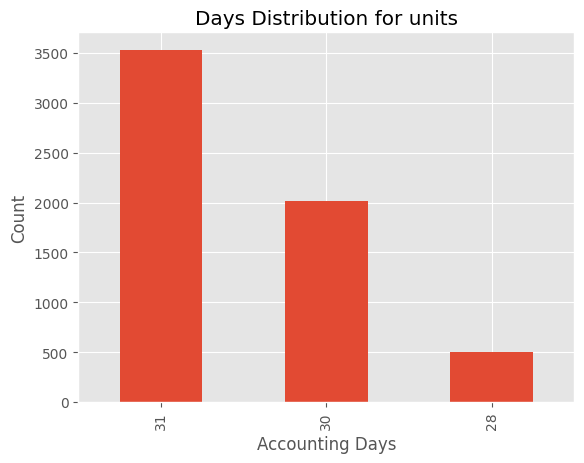

In [15]:
# Plot distribution
ax = df['Days'].value_counts().plot(kind='bar', title='Days Distribution for units')
ax.set_xlabel('Accounting Days')
ax.set_ylabel('Count')

In [16]:
# Dig 'Period' column
df['Period'].value_counts()

Period
1     252
2     252
23    252
22    252
21    252
20    252
19    252
18    252
17    252
16    252
15    252
14    252
13    252
12    252
11    252
10    252
9     252
8     252
7     252
6     252
5     252
4     252
3     252
24    252
Name: count, dtype: int64

In [17]:
df['Unit'].value_counts()

Unit
00040302CD88    672
00040302CE36    672
00040302CF03    672
00040302CF28    672
00040302D006    672
00040302D014    672
0004030A635E    672
0004030B92EE    672
0004030BEB57    672
Name: count, dtype: int64

In [18]:
df['Account'].value_counts()

Account
Other Controllables          1512
Other Non-controllables      1080
Other Labor-related Costs     648
Maintenance & Repair          648
Sales                         216
Cost of Sales - Food          216
Cost of Sales - Paper         216
Crew Labor                    216
Management Labor              216
Advertising                   216
Promotion                     216
Outside Services              216
Utilities                     216
Rent                          216
Name: count, dtype: int64

## Feature Relationships

Scatterplot, heatmap correlation, pairplot and groupby comparisons

In [19]:
# Scatter plot
# sns.scatterplot(x= ,y= ,data= )
# sns.pairplot()

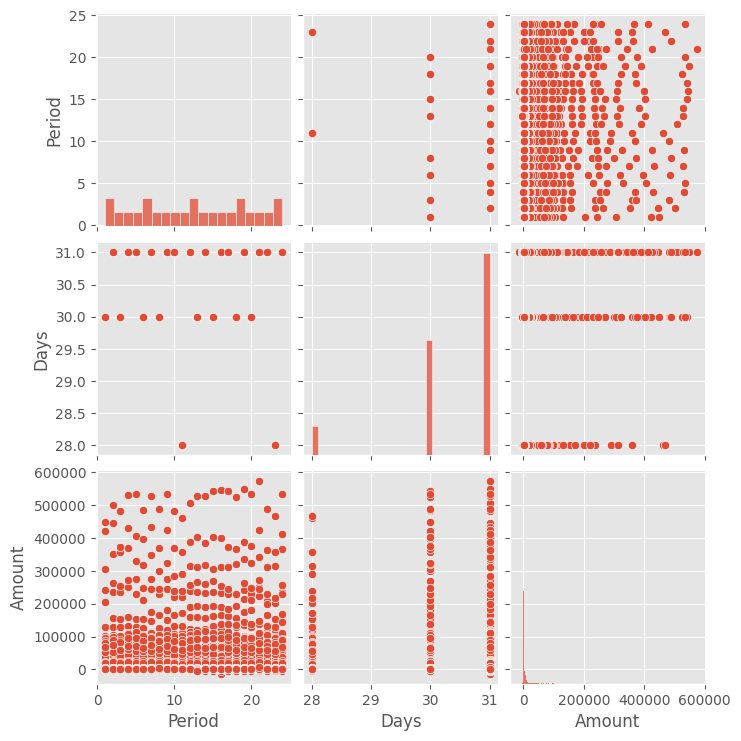

In [20]:
sns.pairplot(df)

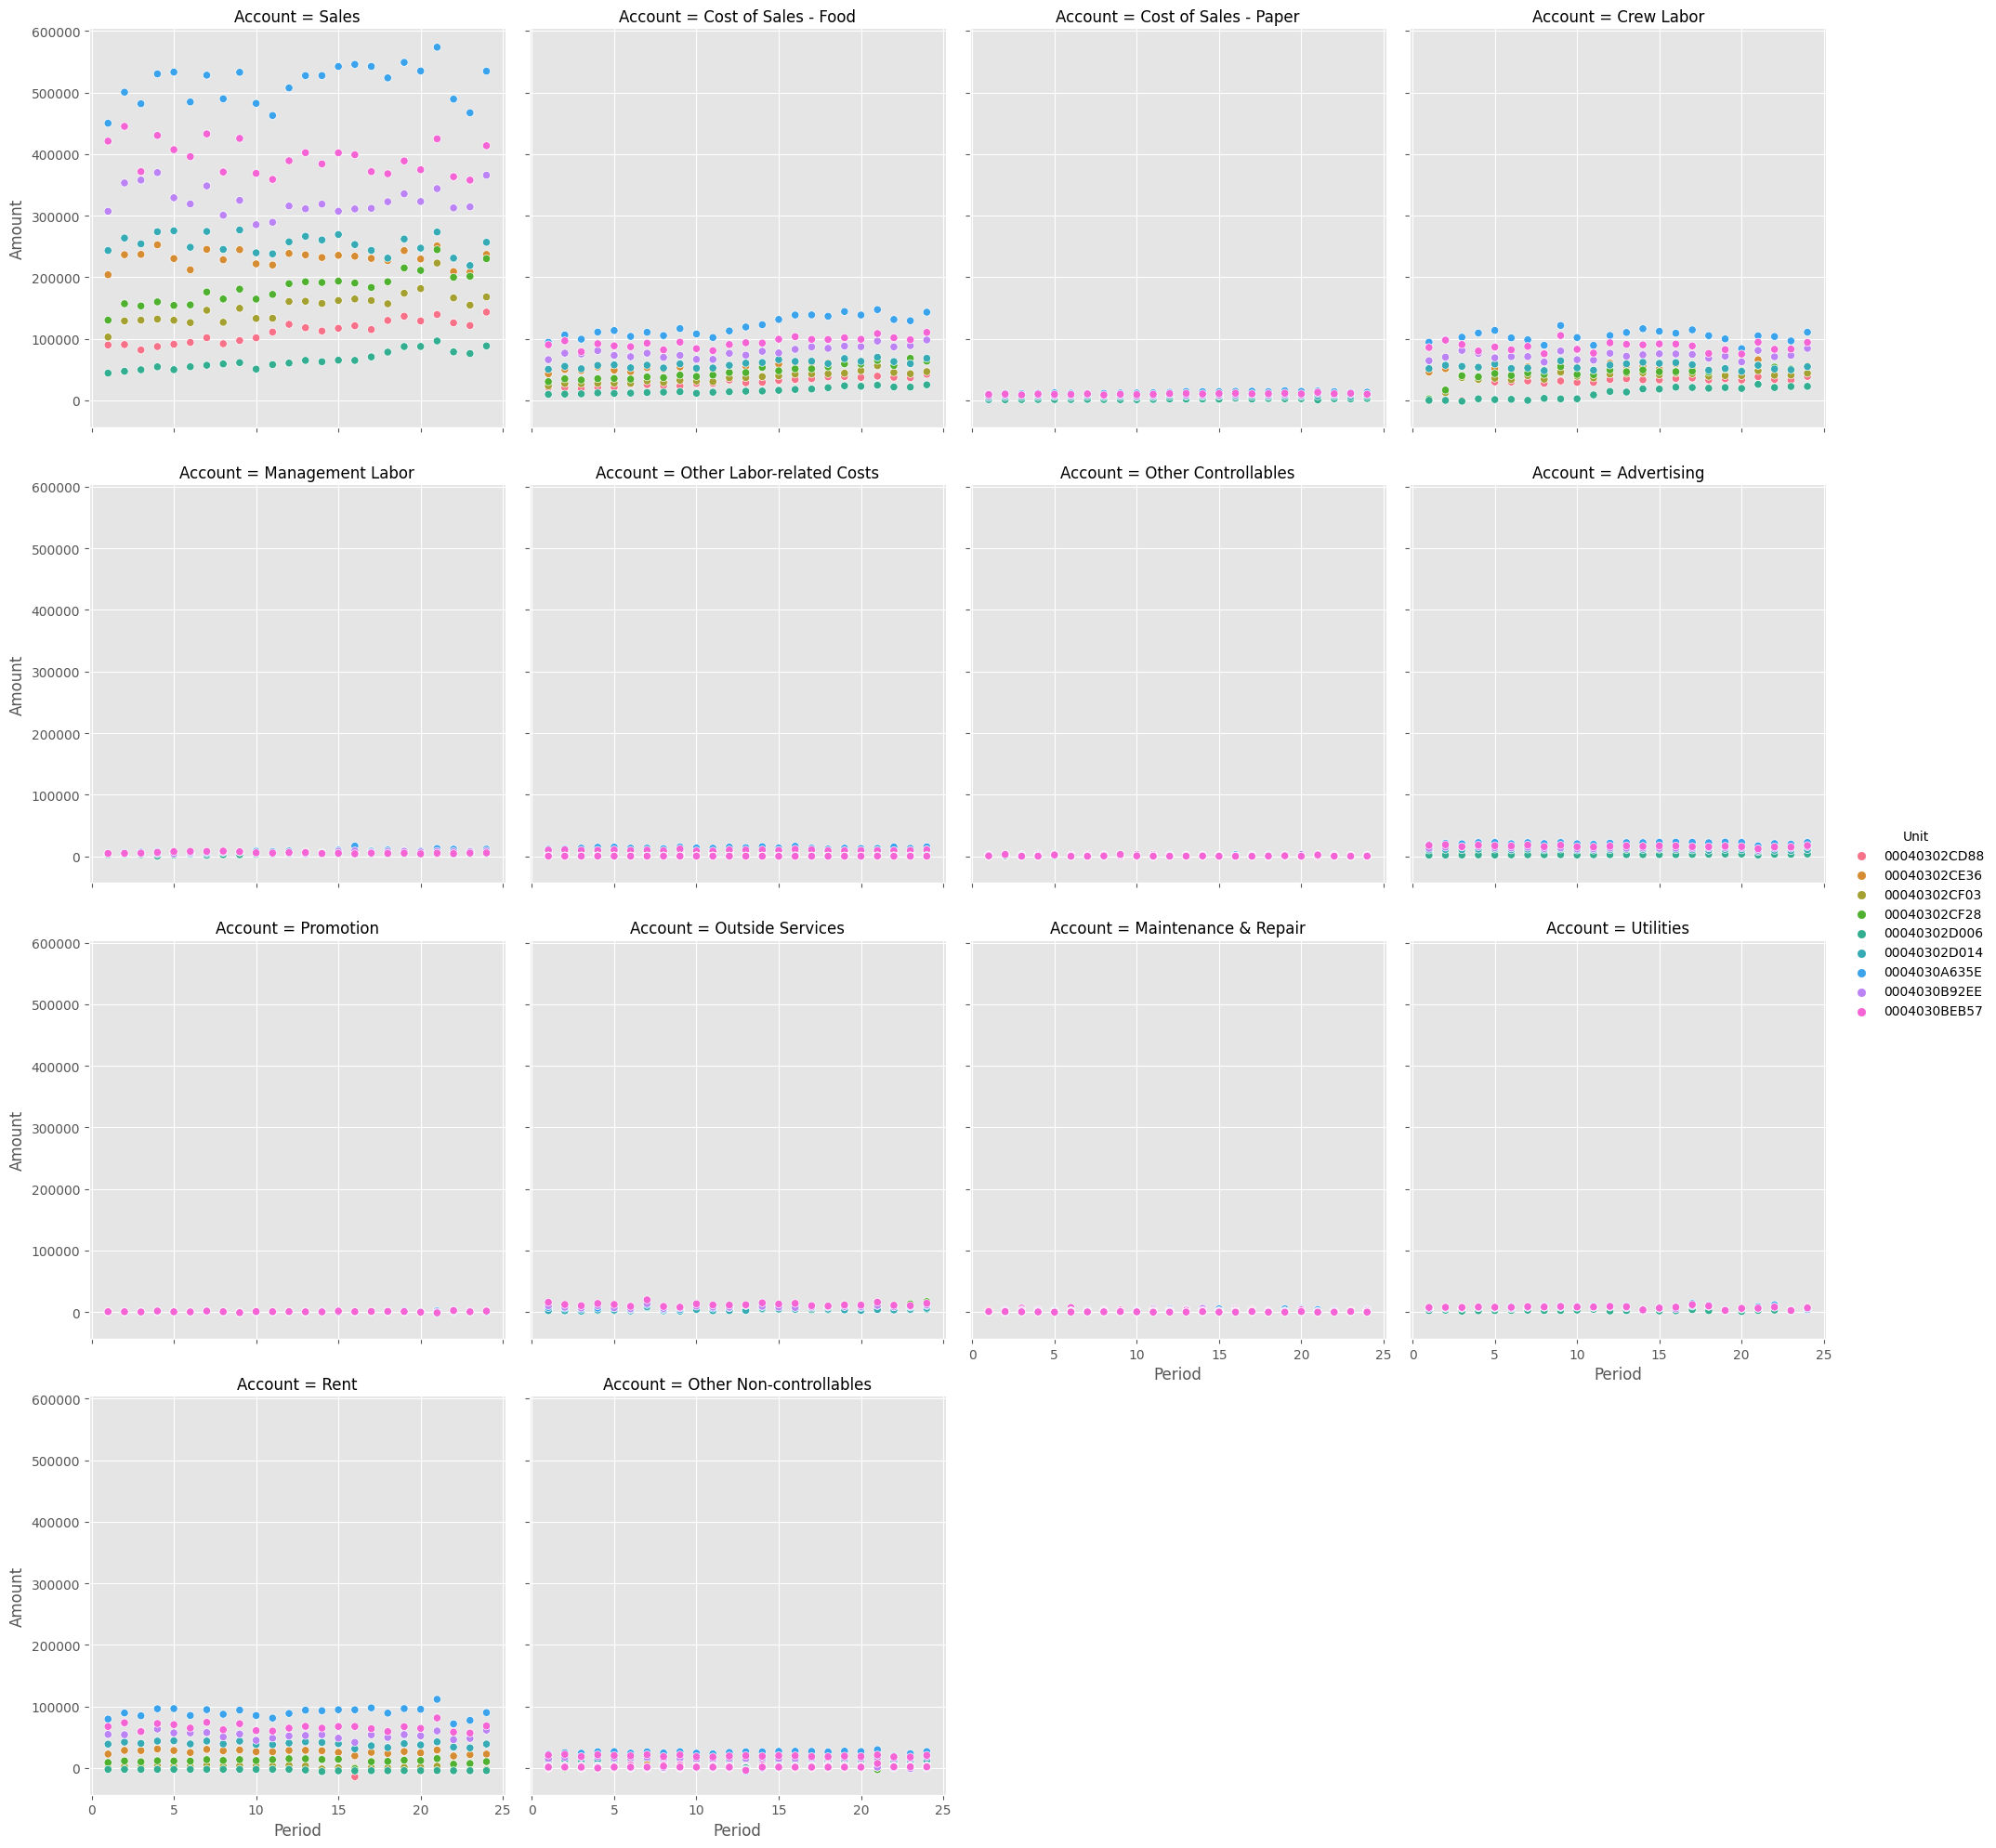

In [30]:
sns.relplot(x='Period', y='Amount', col='Account', hue='Unit', data=df, col_wrap=4)

<Axes: >

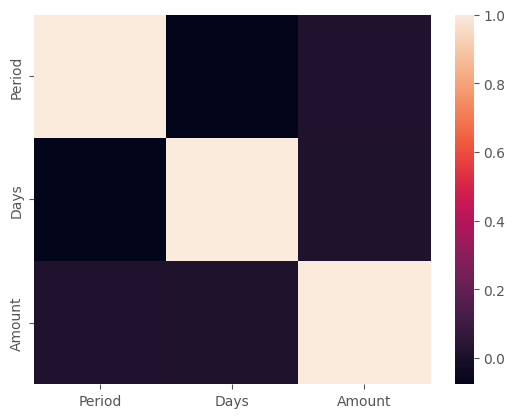

In [21]:
sns.heatmap(df.corr(numeric_only=True))